In [1]:
library("igraph",lib.loc = '../../../R-pkgs/')
library("dplyr",lib.loc = '../../../R-pkgs/')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [132]:
el = read_graph('../../data/processed/mta-elevators.graphml',format = 'graphml')

In [133]:
el

IGRAPH 83899cd U--- 1257 1179 -- 
+ attr: label (v/c), node_type (v/c), id (v/c)
+ edges from 83899cd:
 [1]  1--  2  1--  3  2--  4  3--  4  3--  5  3--  7  3--  9  5--  6  6--756
[10]  6--757  6--758  6--759  7--  8  8--726  8--727  8--728  8--729  8--730
[19]  8--731  8--732  8--733  9-- 10 10--760 10--761 10--762 10--763 11-- 12
[28] 11-- 13 12-- 14 13--779 13--780 14-- 15 15--781 15--782 16-- 17 16-- 18
[37] 18-- 19 18-- 21 19-- 20 20--843 20--844 20--845 21-- 22 22--846 22--847
[46] 22--848 23-- 24 23-- 25 25-- 26 25-- 28 25-- 30 26-- 27 27--839 27--840
[55] 27--841 27--842 28-- 29 29--833 29--834 30-- 31 31--835 31--836 31--837
[64] 31--838 32-- 33 32-- 34 33-- 35 34--738 34--739 35-- 36 36--740 36--741
+ ... omitted several edges

In [134]:
unique(get.vertex.attribute(el,'node_type'))

[1] "Elevator"        "Street"          "Mezzanine"       "Platform"       
[5] "Lower Mezzanine" "Upper Mezzanine" "Unknown"         "Train"

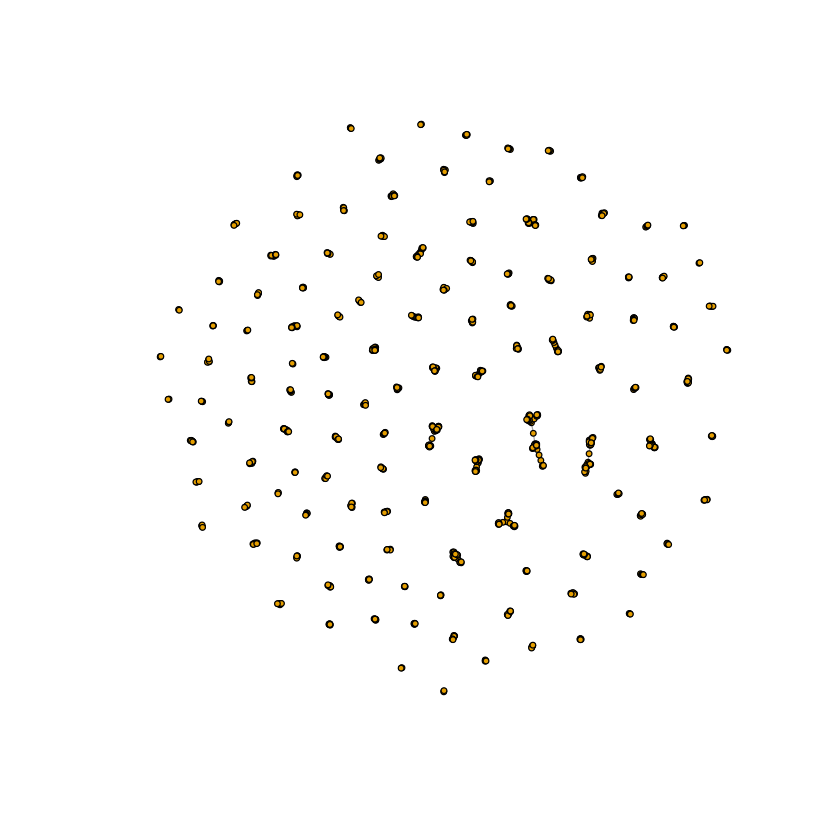

In [135]:
plot(el,vertex.size=2,vertex.label=NA)

In [137]:
comp = components(el)
V(el)$component <- comp$membership

In [152]:
mapcolors <- function(x){
    if(x=="Elevator"){
        return("lightblue")
    }else if(x=='Street'){
        return("orange")
    }else if(x=="Platform"){
        return("white")
    }else if(grepl(pattern = "Mezzanine",x = x)){
        return("yellow")
    }else if(x=="Train"){
        return("red")
    }else {
        return("black")
    }
}

In [153]:
cols <- sapply(V(el)$node_type,FUN=mapcolors,simplify = TRUE)
V(el)$color <- cols

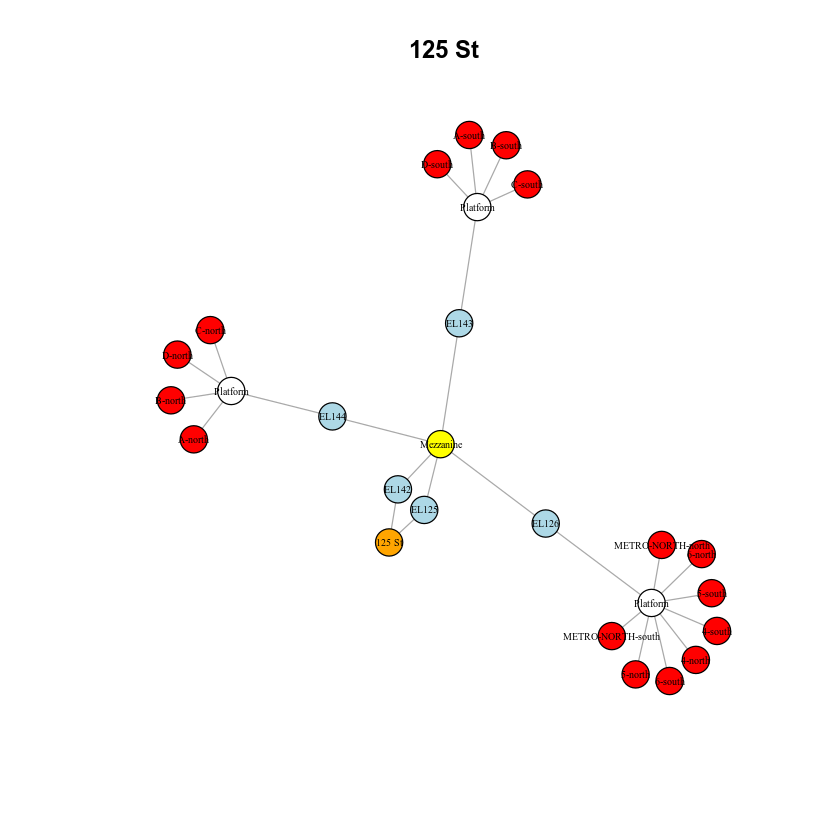

In [188]:
g <- induced_subgraph(el,V(el)[V(el)$component == 1])
plot(g,color=V(g)$color,vertex.size=10,vertex.label.cex=0.5,vertex.label.color='black',main=V(g)$label[V(g)$node_type=="Street"])

In [237]:
ee <- read.csv('../../data/interim/crosswalks/EE_master_list.csv',stringsAsFactors = F)

In [238]:
head(ee)

X,station_name,equipment_id,description,borough,subway_lines,equipment_type,ada_compliant,is_active,direction,subset_lines,connection_to_street,st_name_opd_format,line,notes,geometry,lat,lon
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
0,125 St,EL125,125 St & Lexington Ave (NE corner) to Mezzanine for service in both directions,MN,4/5/6/METRO-NORTH,EL,Y,Y,both directions,4/5/6/METRO-NORTH,Y,125th St,4-5-6-6 Express,"4,6-all times, 5-all times exc nights, 6 Express-weekdays AM southbound, PM northbound",POINT (-73.93759400055725 40.80413800058724),40.80414,-73.93759
1,125 St,EL142,125 St & St Nicholas Ave (SW corner) to Mezzanine for service in both directions,MN,A/B/C/D,EL,Y,Y,both directions,A/B/C/D,Y,125th St,A-B-C-D,"A,D-all times, B-weekdays and evenings, C-all times exc nights",POINT (-73.95224799734774 40.81107167299457),40.81107,-73.95225
2,125 St,EL143,Mezzanine to downtown Platform,MN,A/B/C/D,EL,Y,Y,downtown,A/B/C/D,N,125th St,A-B-C-D,"A,D-all times, B-weekdays and evenings, C-all times exc nights",POINT (-73.95224799734774 40.81107167299457),40.81107,-73.95225
3,125 St,EL126,Mezzanine to Platforms for service in both directions on all lines,MN,4/5/6/METRO-NORTH,EL,Y,Y,both directions,4/5/6/METRO-NORTH,N,125th St,4-5-6-6 Express,"4,6-all times, 5-all times exc nights, 6 Express-weekdays AM southbound, PM northbound",POINT (-73.93759400055725 40.80413800058724),40.80414,-73.93759
4,125 St,EL144,Mezzanine to uptown Platform,MN,A/B/C/D,EL,Y,Y,uptown,A/B/C/D,N,125th St,A-B-C-D,"A,D-all times, B-weekdays and evenings, C-all times exc nights",POINT (-73.95224799734774 40.81107167299457),40.81107,-73.95225
5,125 St,ES102,Street to Mezzanine,MN,1,ES,N,Y,,1,Y,125th St,1,1-all times,POINT (-73.95837200097044 40.81558099997893),40.81558,-73.95837


In [317]:
pdf('../../reports/figures/station_graphs.pdf')
par(mfrow=c(3,3),mar=c(5.1,4.1,4.1,2.1))
unique_comps = unique(V(el)$component)
incomplete_stations = vector()
for (i in unique_comps){
#     if((i-1) %% 9 == 0){
#         par(mfrow=c(3,3),mar=c(5.1,4.1,4.1,2.1))
#     }
    g <- induced_subgraph(el,V(el)[V(el)$component == i])
    if(("Street" %in% V(g)$node_type)){
        incomplete_stations <- c(incomplete_stations,V(g)$label[V(g)$node_type == "Elevator"])
        plot(g,color=V(g)$color,vertex.size=15,vertex.label.cex=0.01,vertex.label.dist=0,vertex.label.color='black',layout=layout_as_tree(g,root=V(g)[V(g)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
    }
}
dev.off()

png 
  2

In [246]:
el_centrality <- data.frame(el_id = V(el)$label[V(el)$node_type == "Elevator"],bw_cent = centr_betw(el)$res[V(el)$node_type == "Elevator"],stringsAsFactors = F)

In [249]:
el_centrality %>% arrange(desc(bw_cent)) %>% head()

el_id,bw_cent
<chr>,<dbl>
EL723,650
EL232,380
EL301,342
EL720,308
EL733X,308
EL719,230


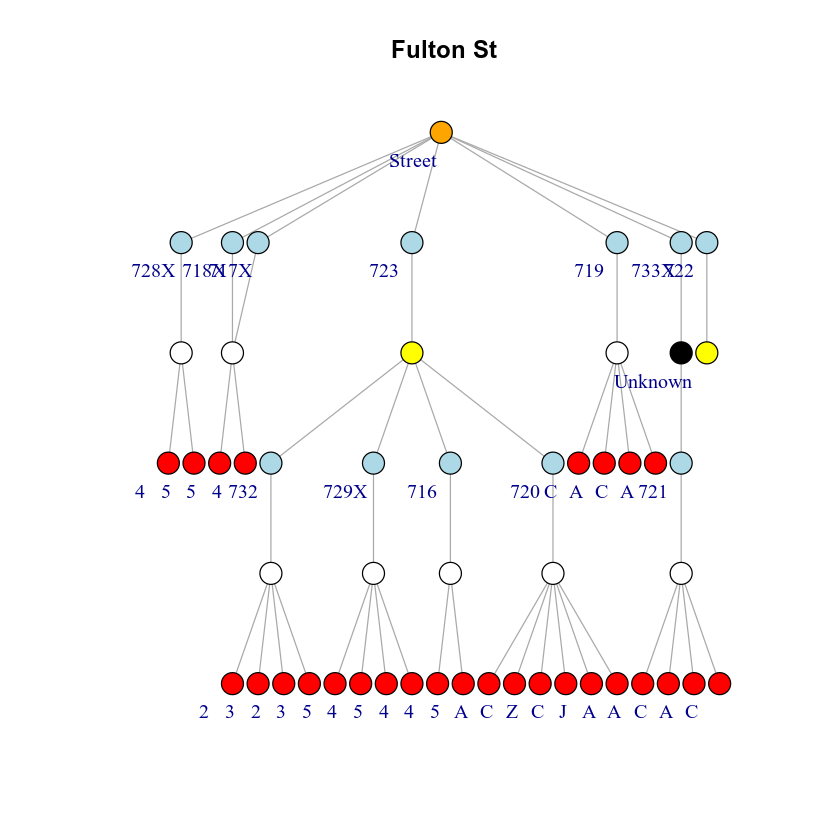

In [297]:
par(mfrow=c(1,1))
h <- induced_subgraph(el,V(el)[V(el)$component == comp$membership[V(el)$label == "EL719"]])
plot(h,vertex.size=8,vertex.label=gsub(pattern="-north|-south|Platform|Upper|Lower|Mezzanine|EL",'',V(h)$label),vertex.label.cex=1,vertex.label.dist=-2,layout=layout_as_tree(h,root=V(h)[V(h)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(h)$label]))

In [292]:
V(h)$node_type

[1] "Elevator"  "Street"    "Mezzanine" "Elevator"  "Platform"  "Elevator" 
 [7] "Platform"  "Elevator"  "Platform"  "Elevator"  "Platform"  "Train"    
[13] "Train"     "Train"     "Train"     "Train"     "Train"     "Train"    
[19] "Train"     "Train"     "Train"     "Train"     "Train"     "Train"    
[25] "Train"     "Train"     "Train"     "Train"     "Train"     "Train"    
[31] "Train"     "Train"     "Train"     "Train"     "Train"     "Train"    
[37] "Train"     "Train"     "Train"     "Train"